<h1>Summary</h1>

<h3>Classification</h3>
多くの場合あまり調整をしなくても十分に高い性能を示すため、より高度な技術を利用する前のベースラインとして利用可能<br>
特徴量数、又はサンプルの個数のどちらが大きくなっても、予測は遅くなる<br>
多数の特徴量（数百以上）を持つデータセットではうまく機能せず、ほとんどの特徴量が多くの場合0となるような疎なデータセットでは特に性能が悪い

<h4>重要なパラメータ</h4>
・近傍点の数（n_neighbors）<br>
・データポイント間の距離測度（metric, デフォルトはユークリッド距離）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

<h2>Classification</h2>

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

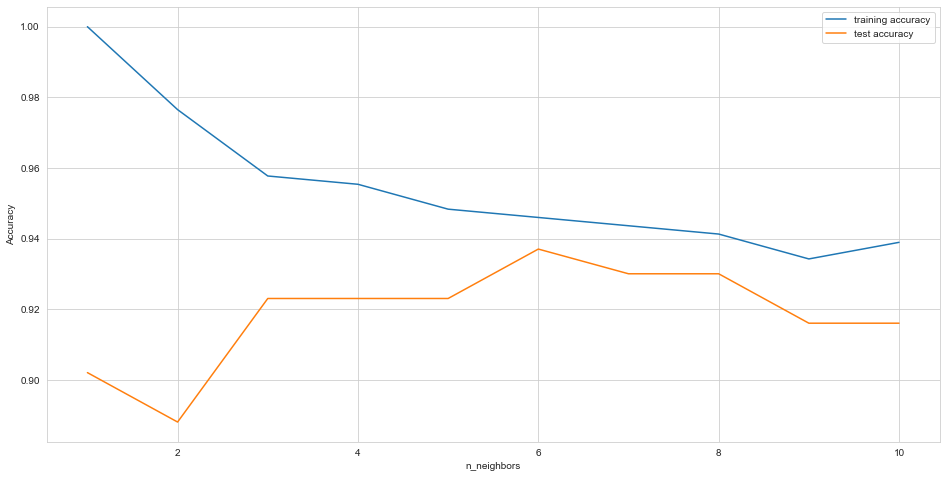

In [5]:
plt.figure(figsize = (16,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

<h2>Regression</h2>

In [6]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X.shape)
print(y.shape)

(40, 1)
(40,)


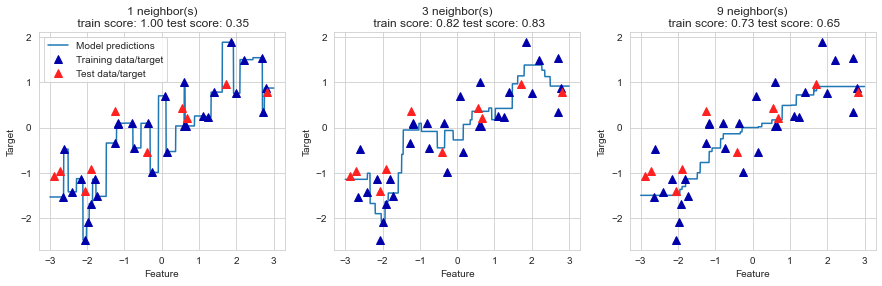

In [7]:
from sklearn.neighbors import KNeighborsRegressor

fig, axes = plt.subplots(1, 3, figsize = (15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, "^", c = mglearn.cm2(1), markersize = 8)
    ax.set_title(
        f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}"
    ) # scoreは決定係数
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = "best")